In [1]:
!pip install qiskit
!pip install qiskit-aer

In [2]:
from qiskit import *
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_histogram

In [3]:
#Encode inputs in qubits 0, 1
qc = QuantumCircuit(4, 2)
qc.x(0)
qc.x(1)

In [4]:
#Using CNOT to write XOR of inputs on qubit 2
qc.cx(0,2)
qc.cx(1,2)

In [6]:
#Extracting outputs
qc.measure(2,0)
qc.measure(3,1)

qc.draw()

┌───┐                
q_0: ┤ X ├──■─────────────
     ├───┤  │             
q_1: ┤ X ├──┼────■────────
     └───┘┌─┴─┐┌─┴─┐┌─┐┌─┐
q_2: ─────┤ X ├┤ X ├┤M├┤M├
      ┌─┐ └┬─┬┘└───┘└╥┘└╥┘
q_3: ─┤M├──┤M├───────╫──╫─
      └╥┘  └╥┘       ║  ║ 
c: 2/══╩════╩════════╩══╩═
       1    1        0  0

In [7]:
qc = QuantumCircuit(4,2)

qc.x(0)
qc.x(1)

qc.cx(0,2)
qc.cx(1,2)

qc.ccx(0,1,3)

qc.measure(2,0)
qc.measure(3,1)

qc.draw()

┌───┐                     
q_0: ┤ X ├──■─────────■────────
     ├───┤  │         │        
q_1: ┤ X ├──┼────■────■────────
     └───┘┌─┴─┐┌─┴─┐  │  ┌─┐   
q_2: ─────┤ X ├┤ X ├──┼──┤M├───
          └───┘└───┘┌─┴─┐└╥┘┌─┐
q_3: ───────────────┤ X ├─╫─┤M├
                    └───┘ ║ └╥┘
c: 2/═════════════════════╩══╩═
                          0  1

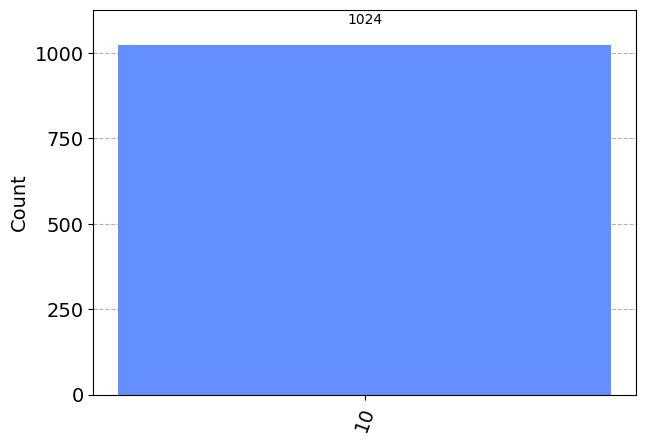

In [8]:
#Running on a quantum simulator
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)